<a href="https://colab.research.google.com/github/Sarinda251/QOurs-Test/blob/master/QOurs_ImgDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import cv2 as cv
import imutils
from google.colab.patches import cv2_imshow
import heapq

In [0]:
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv.arcLength(c, True)
		approx = cv.approxPolyDP(c, 0.04 * peri, True)
    # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			# (x, y, w, h) = cv.boundingRect(approx)
			# ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		elif len(approx) == 6:
			shape = "hexagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape, len(approx)

In [0]:
def scanCode(imgArg):
  
  # read image
  img = cv.imread(imgArg, 1)
  resized = imutils.resize(img, width=300)
  ratio = img.shape[0] / float(resized.shape[0])

  plt.imshow(resized)
  plt.show()

  # convert the resized image to grayscale, blur it slightly, and threshold it
  gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
  blurred = cv.GaussianBlur(gray, (5, 5), 0)

  # calculate normal and inverse
  thresh = cv.threshold(blurred, 128, 255, cv.THRESH_BINARY)[1]
  threshInv = cv.threshold(blurred, 128, 255, cv.THRESH_BINARY_INV)[1]
  
  plt.imshow(thresh)
  plt.show()
  plt.imshow(threshInv)
  plt.show()
  
  # find which one has more cnts
  cntsReg = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
  cntsReg = imutils.grab_contours(cntsReg)
  cntsInv = cv.findContours(threshInv.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
  cntsInv = imutils.grab_contours(cntsInv)
  sd = ShapeDetector()

  # pick one to use
  if (len(cntsReg) > len(cntsInv)):
    cnts = cntsReg
  else:
    cnts = cntsInv

  #cnts = cntsInv
  # calculate dimensions
  numShapes = len(cnts)
  rows = 0
  cols = 0

  if(numShapes < 4):
    cols = numShapes
    rows = 1
  else:
    cols = 4
    rows = ((numShapes - 1) // 4) + 1

  #print(numShapes)
  #print(cols)
  #print(rows)

  colWidth = 300 / cols
  rowWidth = resized.shape[0] / rows
  #print(resized.shape)
  #print(rowWidth)
  #print(colWidth)

  shapesList = [None for i in range(numShapes)]

  # shape detection
  for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv.moments(c)
    cX = int((M["m10"] / M["m00"]))
    cY = int((M["m01"] / M["m00"]))
    
    #print(sd.detect(c))
    (shape, sides) = sd.detect(c)
    
    #print(cX, cY)
    position = 0


    while(cX >= colWidth):
      cX -= colWidth
      position += 1

    while(cY >= rowWidth):
      cY -= rowWidth
      position += 4

    
    #print(position)
    if(position > numShapes - 1):
      print("invalid code")
      return -1
    
    if(shapesList[position] != None):
      print("collision at position", position)
      return -1

    shapesList[position] = (shape, sides)
    # print(shapesList)
    

  hashCode = str(numShapes)
  for s in shapesList:
    if(s[0] == "circle"):
      hashCode = hashCode + str(0)
    else:
      hashCode = hashCode + str(s[1])
  
  print(shapesList)
  #print(hashCode)
  return hashCode

testing

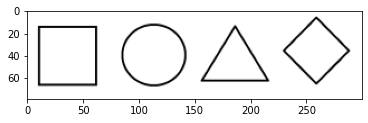

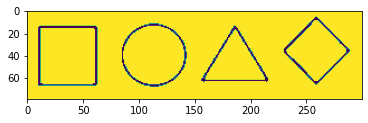

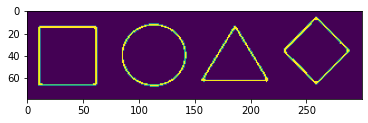

[('rectangle', 4), ('circle', 7), ('triangle', 3), ('rectangle', 4)]


'44034'

In [0]:
scanCode("testImg1.png")

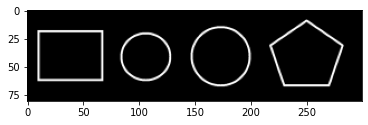

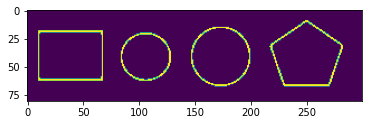

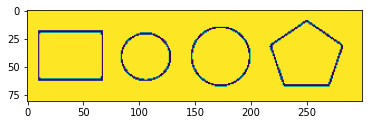

[('rectangle', 4), ('circle', 8), ('circle', 8), ('pentagon', 5)]


'44005'

In [0]:
scanCode("testImg2.png")

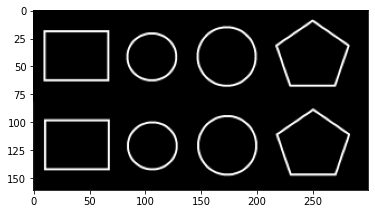

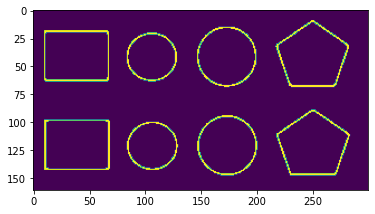

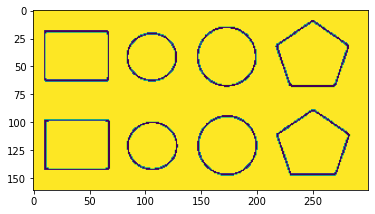

[('rectangle', 4), ('circle', 7), ('circle', 8), ('pentagon', 5), ('rectangle', 4), ('circle', 7), ('circle', 8), ('pentagon', 5)]


'840054005'

In [0]:
scanCode("testImg3.png")

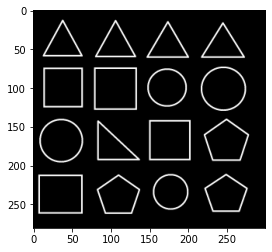

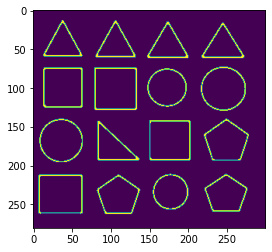

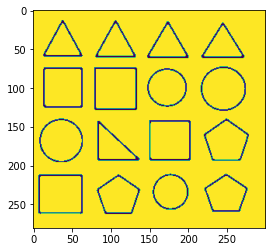

[('triangle', 3), ('triangle', 3), ('triangle', 3), ('triangle', 3), ('rectangle', 4), ('rectangle', 4), ('hexagon', 6), ('circle', 8), ('circle', 8), ('triangle', 3), ('rectangle', 4), ('pentagon', 5), ('rectangle', 4), ('pentagon', 5), ('circle', 8), ('pentagon', 5)]


'163333446003454505'

In [0]:
scanCode("testImg4.png")

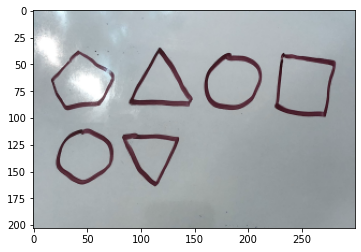

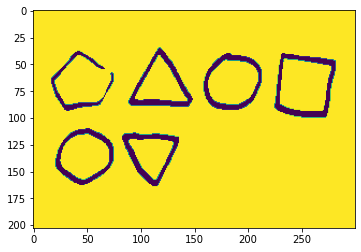

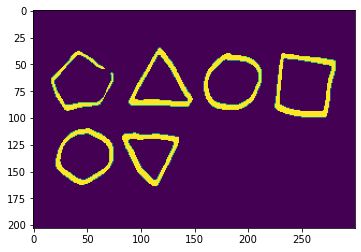

[('circle', 8), ('triangle', 3), ('hexagon', 6), ('rectangle', 4), ('hexagon', 6), ('rectangle', 4)]


'6036464'

In [0]:
scanCode("irlTest1.jpg")

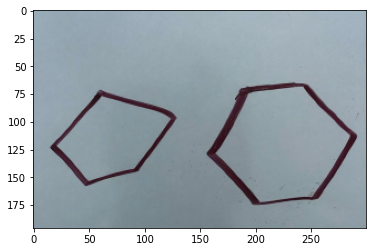

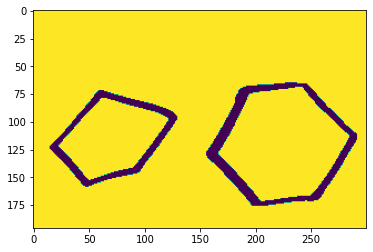

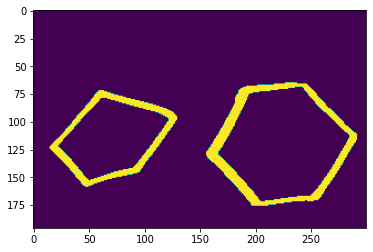

[('pentagon', 5), ('hexagon', 6)]


'256'

In [0]:
scanCode("irlTest2.jpg")